<a href="https://colab.research.google.com/github/EmilisGit/Vaizdu_apdorojimas/blob/main/Vaizdu_apdorojimas_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import os
from PIL import Image

In [ ]:
!pip install datasets -q
from datasets import load_dataset

ds = load_dataset("Shavindra/satellite-512")

In [ ]:
ds = ds.shuffle(seed=42)
dataset_subset = ds['train']['image'][:50]

In [ ]:
#@title Funkcijos
def show_image(image):
  plt.figure(figsize=(5, 5))
  plt.axis('off')
  plt.imshow(image)
  plt.show()

def preprocess_image(image):
  cv2_image = np.array(image)
  cv2_image = cv2.resize(cv2_image, (128, 128))
  return cv2_image

def apply_random_rotation(image):
  rows, cols = image.shape[:2]

  # centro koordinatės
  Cx , Cy = rows//2, cols//2
  rand_angle = random.randint(-180,180)
  M = cv2.getRotationMatrix2D((Cy, Cx),rand_angle ,1)
  aug_imgR = cv2.warpAffine(image, M, (cols, rows))
  return aug_imgR

def apply_median_blur(image):
  aug_img = cv2.medianBlur(image, 3)
  return aug_img

def apply_mutation(image):
  # Pakeisti į hsv, kad galėtume pakeisti parametrus
  hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV).astype(np.float32)

  # brightness
  brightness_factor = np.random.uniform(0.5, 1.5)
  hsv[:, :, 2] *= brightness_factor

  #saturation
  saturation_factor = np.random.uniform(0.5, 1.5)
  hsv[:, :, 1] *= saturation_factor

  #hue
  hue_shift = np.random.randint(-10, 10)
  hsv[:, :, 0] = (hsv[:, :, 0] + hue_shift) % 180

  hsv = np.clip(hsv, 0, 255).astype(np.uint8)

  mutated_image = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

  #contrast
  contrast_factor = np.random.uniform(0.5, 1.5)
  mutated_image = np.clip(contrast_factor * mutated_image, 0, 255).astype(np.uint8)

  return mutated_image

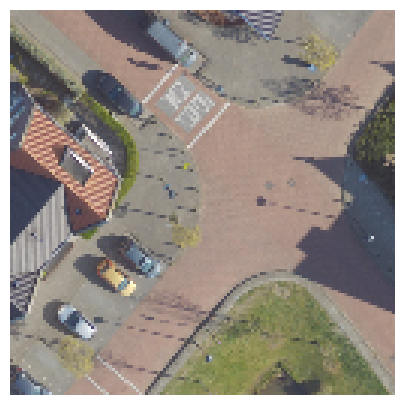

In [ ]:
sample_image = dataset_subset[0]
image = preprocess_image(sample_image)
show_image(image)

In [ ]:
run_pipeline(dataset_subset, "./content/nuotraukos")

Saving image 0 -> 4 processed images to ./content/nuotraukos
Saving image 1 -> 4 processed images to ./content/nuotraukos
Saving image 2 -> 4 processed images to ./content/nuotraukos
Saving image 3 -> 4 processed images to ./content/nuotraukos
Saving image 4 -> 4 processed images to ./content/nuotraukos
Saving image 5 -> 4 processed images to ./content/nuotraukos
Saving image 6 -> 4 processed images to ./content/nuotraukos
Saving image 7 -> 4 processed images to ./content/nuotraukos
Saving image 8 -> 4 processed images to ./content/nuotraukos
Saving image 9 -> 4 processed images to ./content/nuotraukos
Saving image 10 -> 4 processed images to ./content/nuotraukos
Saving image 11 -> 4 processed images to ./content/nuotraukos
Saving image 12 -> 4 processed images to ./content/nuotraukos
Saving image 13 -> 4 processed images to ./content/nuotraukos
Saving image 14 -> 4 processed images to ./content/nuotraukos
Saving image 15 -> 4 processed images to ./content/nuotraukos
Saving image 16 ->